In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
train

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [3]:
test = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')
test

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,...,NaN,NaN,e,NaN,NaN,f,f,NaN,d,u
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
2077961,5194906,5.73,x,e,e,f,a,NaN,w,6.16,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,...,NaN,s,g,NaN,NaN,f,f,NaN,d,a


In [4]:
train.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [5]:
train.describe()

,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116941e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309848e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657931e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


In [6]:
train.dtypes

id                        int64
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [7]:
train.isna().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [8]:
train.duplicated().sum()

0

In [9]:
missing_df = (train.isna().sum()/len(train))*100
missing_df = missing_df[missing_df>0].sort_values(ascending = False).reset_index()
missing_df

,index,0
0,veil-type,94.884350
1,spore-print-color,91.425482
2,stem-root,88.452732
3,veil-color,87.936970
4,stem-surface,63.551362
5,gill-spacing,40.373988
6,cap-surface,21.528227
7,gill-attachment,16.809280
8,ring-type,4.134818
9,gill-color,0.001829


In [10]:
missing_df.columns = ['column','missing_percentage']

In [11]:
missing_df

,column,missing_percentage
0,veil-type,94.884350
1,spore-print-color,91.425482
2,stem-root,88.452732
3,veil-color,87.936970
4,stem-surface,63.551362
5,gill-spacing,40.373988
6,cap-surface,21.528227
7,gill-attachment,16.809280
8,ring-type,4.134818
9,gill-color,0.001829


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

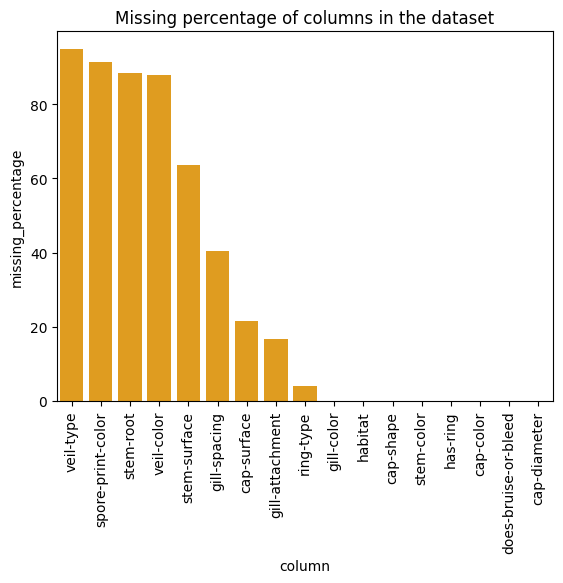

In [13]:
sns.barplot(x = 'column', y = 'missing_percentage',data = missing_df, color='orange')
plt.xticks(rotation = 90)
plt.title('Missing percentage of columns in the dataset')
plt.show()

In [ ]:
# sns.barplot(x = 'column', y = 'missing_percentage',data = train, color='orange')
# plt.xticks(rotation = 90)
# plt.title('Missing percentage of columns in the dataset')
# plt.show()

Drop columns with more than 50% missing values

### Imputing missing values

In [14]:
train.skew(numeric_only=True)

id             -2.507583e-15
cap-diameter    3.972609e+00
stem-height     1.926682e+00
stem-width      1.235427e+00
dtype: float64

These columns are positively skewed, so its best to use median to impute the missing values in here. For categorical columns we will fill the NA values using "unknown"

In [15]:
#Removing NA's
def remove_na(df):
    for col in df.columns:
        if df[col].dtype == object:
            df[col].fillna("Unknown",inplace = True)
        if df[col].dtype== float:
            df[col].fillna(df[col].median(),inplace = True)
    return df

In [16]:
train = remove_na(train)
train

/tmp/ipykernel_36/3489909365.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown",inplace = True)
/tmp/ipykernel_36/3489909365.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,Unknown,Unknown,w,Unknown,Unknown,f,f,Unknown,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,Unknown,y,o,Unknown,Unknown,t,z,Unknown,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,Unknown,s,n,Unknown,Unknown,f,f,Unknown,l,w
3,3,e,3.88,f,y,g,f,s,Unknown,g,...,Unknown,Unknown,w,Unknown,Unknown,f,f,Unknown,d,u
4,4,e,5.85,x,l,w,f,d,Unknown,w,...,Unknown,Unknown,w,Unknown,Unknown,f,f,Unknown,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,Unknown,n,t,Unknown,Unknown,w,...,b,Unknown,w,u,w,t,g,Unknown,d,u
3116941,3116941,e,10.88,s,Unknown,w,t,d,c,p,...,Unknown,Unknown,w,Unknown,Unknown,f,f,Unknown,d,u
3116942,3116942,p,7.82,x,e,e,f,a,Unknown,w,...,Unknown,Unknown,y,Unknown,w,t,z,Unknown,d,a
3116943,3116943,e,9.45,p,i,n,t,e,Unknown,p,...,Unknown,y,w,Unknown,Unknown,t,p,Unknown,d,u


In [19]:
test = remove_na(test)
test

/tmp/ipykernel_36/3489909365.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace = True)
/tmp/ipykernel_36/3489909365.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,Unknown,n,t,Unknown,Unknown,w,11.13,...,b,Unknown,w,u,w,t,g,Unknown,d,a
1,3116946,6.90,o,t,o,f,Unknown,c,y,1.27,...,Unknown,Unknown,n,Unknown,Unknown,f,f,Unknown,d,a
2,3116947,2.00,b,g,n,f,Unknown,c,n,6.18,...,Unknown,Unknown,n,Unknown,Unknown,f,f,Unknown,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,Unknown,Unknown,w,Unknown,n,t,z,Unknown,d,u
4,3116949,6.17,x,h,y,f,p,Unknown,y,6.73,...,Unknown,Unknown,y,Unknown,y,t,Unknown,Unknown,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,...,Unknown,Unknown,e,Unknown,Unknown,f,f,Unknown,d,u
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,...,Unknown,Unknown,w,Unknown,Unknown,f,f,Unknown,g,a
2077961,5194906,5.73,x,e,e,f,a,Unknown,w,6.16,...,Unknown,Unknown,y,Unknown,w,t,z,Unknown,d,a
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,...,Unknown,s,g,Unknown,Unknown,f,f,Unknown,d,a


In [17]:
train.shape

(3116945, 22)

In [18]:
train.isna().sum()

id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [20]:
train

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,Unknown,Unknown,w,Unknown,Unknown,f,f,Unknown,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,Unknown,y,o,Unknown,Unknown,t,z,Unknown,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,Unknown,s,n,Unknown,Unknown,f,f,Unknown,l,w
3,3,e,3.88,f,y,g,f,s,Unknown,g,...,Unknown,Unknown,w,Unknown,Unknown,f,f,Unknown,d,u
4,4,e,5.85,x,l,w,f,d,Unknown,w,...,Unknown,Unknown,w,Unknown,Unknown,f,f,Unknown,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,Unknown,n,t,Unknown,Unknown,w,...,b,Unknown,w,u,w,t,g,Unknown,d,u
3116941,3116941,e,10.88,s,Unknown,w,t,d,c,p,...,Unknown,Unknown,w,Unknown,Unknown,f,f,Unknown,d,u
3116942,3116942,p,7.82,x,e,e,f,a,Unknown,w,...,Unknown,Unknown,y,Unknown,w,t,z,Unknown,d,a
3116943,3116943,e,9.45,p,i,n,t,e,Unknown,p,...,Unknown,y,w,Unknown,Unknown,t,p,Unknown,d,u


In [21]:
train['cap-diameter']

0           8.80
1           4.51
2           6.94
3           3.88
4           5.85
           ...  
3116940     9.29
3116941    10.88
3116942     7.82
3116943     9.45
3116944     3.20
Name: cap-diameter, Length: 3116945, dtype: float64

In [22]:
train['cap-shape'].value_counts()

cap-shape
x        1436026
f         676238
s         365146
b         318646
o         108835
          ...   
12.62          1
5.15           1
19.04          1
49.21          1
19.06          1
Name: count, Length: 75, dtype: int64

There are some extra values in some columns. So in every column we will only keep some values and remanining we will fill them as unknowns

In [23]:
train.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

#### Feature Engineering

In [26]:
valid_col_vals = {
    "cap-shape": ['b', 'c', 'x', 'f', 'k', 's'],
    "cap-surface": ['f', 'g', 'y', 's'],
    "cap-color": ['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'],
    "does-bruise-or-bleed": ['t', 'f'],
    "has-ring": ['t', 'f'],
    #"odor": ['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'],  # 'n' indicates 'none'
    "gill-attachment": ['a', 'd', 'f', 'n'],
    "gill-spacing": ['c', 'w', 'd'],
    #"gill_size": ['b', 'n'],
    "gill-color": ['k', 'n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y'],
    #"stalk_shape": ['e', 't'],
    "stem-root": ['b', 'c', 'u', 'e', 'z', 'r', '?'],  # '?' indicates missing
    "stem-surface": ['f', 'y', 'k', 's'],
    "stem-color": ['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
    "veil-type": ['p', 'u'],
    "veil-color": ['n', 'o', 'w', 'y'],
    #"ring_number": ['n', 'o', 't'],  # 'n' indicates 'none'
    "ring-type": ['c', 'e', 'f', 'l', 'n', 'p', 's', 'z'],  # 'n' indicates 'none'
    "spore-print-color": ['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'],
    #"population": ['a', 'c', 'n', 's', 'v', 'y'],
    "habitat": ['g', 'l', 'm', 'p', 'u', 'w', 'd']
}

In [24]:
def transform_cat_cols(df):
    for col in df.columns:
        if col in ['odor', 'ring_number', 'ring_type']:
            invalid_indices = df.index[df[col].apply(lambda x: x not in valid_col_vals[col])]
            df.loc[invalid_indices, col] = 'n'
        elif col in ['stem_root']:
            invalid_indices = df.index[df[col].apply(lambda x: x not in valid_col_vals[col])]
            df.loc[invalid_indices, col] = '?'
        elif col in valid_col_vals.keys():
            invalid_indices = df.index[df[col].apply(lambda x: x not in valid_col_vals[col])]
            df.loc[invalid_indices, col] = 'unk'
    return df

In [27]:
train = transform_cat_cols(train)
test = transform_cat_cols(test)

In [28]:
from sklearn.preprocessing import LabelEncoder

#### Label Encoding

In [31]:
def label_encoding(df):
    le = LabelEncoder()
    col_to_encode = ['class','cap-shape','cap-surface','cap-color','does-bruise-or-bleed','has-ring',
    'gill-attachment','gill-spacing','gill-color','stem-root','stem-surface','stem-color','veil-type','veil-color','ring-type','habitat',
    'spore-print-color','season']
    df[col_to_encode] = df[col_to_encode].apply(lambda col: le.fit_transform(col))
    return df

In [32]:
df = label_encoding(train)
df

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,0,8.80,2,2,7,0,0,0,11,...,5,3,8,2,2,0,2,7,0,0
1,1,1,4.51,6,3,8,0,0,0,5,...,5,4,5,2,2,1,8,7,0,3
2,2,0,6.94,2,2,0,0,4,0,11,...,5,2,4,2,2,0,2,7,2,3
3,3,0,3.88,2,4,3,0,4,2,2,...,5,3,8,2,2,0,2,7,0,2
4,4,0,5.85,6,3,9,0,1,2,11,...,5,3,8,2,2,0,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,0,9.29,2,3,4,1,4,2,11,...,0,3,8,1,3,1,7,7,0,2
3116941,3116941,0,10.88,4,3,9,1,1,0,7,...,5,3,8,2,2,0,2,7,0,2
3116942,3116942,1,7.82,6,3,2,0,0,2,11,...,5,3,9,2,3,1,8,7,0,0
3116943,3116943,0,9.45,5,3,4,1,4,2,7,...,5,4,8,2,2,1,5,7,0,2


#### Splitting into train and test

In [33]:
X = df.drop(['class'], axis = 1)
X

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,8.80,2,2,7,0,0,0,11,4.51,...,5,3,8,2,2,0,2,7,0,0
1,1,4.51,6,3,8,0,0,0,5,4.79,...,5,4,5,2,2,1,8,7,0,3
2,2,6.94,2,2,0,0,4,0,11,6.85,...,5,2,4,2,2,0,2,7,2,3
3,3,3.88,2,4,3,0,4,2,2,4.16,...,5,3,8,2,2,0,2,7,0,2
4,4,5.85,6,3,9,0,1,2,11,3.37,...,5,3,8,2,2,0,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,9.29,2,3,4,1,4,2,11,12.14,...,0,3,8,1,3,1,7,7,0,2
3116941,3116941,10.88,4,3,9,1,1,0,7,6.65,...,5,3,8,2,2,0,2,7,0,2
3116942,3116942,7.82,6,3,2,0,0,2,11,9.51,...,5,3,9,2,3,1,8,7,0,0
3116943,3116943,9.45,5,3,4,1,4,2,7,9.13,...,5,4,8,2,2,1,5,7,0,2


In [34]:
X

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,8.80,2,2,7,0,0,0,11,4.51,...,5,3,8,2,2,0,2,7,0,0
1,1,4.51,6,3,8,0,0,0,5,4.79,...,5,4,5,2,2,1,8,7,0,3
2,2,6.94,2,2,0,0,4,0,11,6.85,...,5,2,4,2,2,0,2,7,2,3
3,3,3.88,2,4,3,0,4,2,2,4.16,...,5,3,8,2,2,0,2,7,0,2
4,4,5.85,6,3,9,0,1,2,11,3.37,...,5,3,8,2,2,0,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,9.29,2,3,4,1,4,2,11,12.14,...,0,3,8,1,3,1,7,7,0,2
3116941,3116941,10.88,4,3,9,1,1,0,7,6.65,...,5,3,8,2,2,0,2,7,0,2
3116942,3116942,7.82,6,3,2,0,0,2,11,9.51,...,5,3,9,2,3,1,8,7,0,0
3116943,3116943,9.45,5,3,4,1,4,2,7,9.13,...,5,4,8,2,2,1,5,7,0,2


In [35]:
y = df['class']
y

0          0
1          1
2          0
3          0
4          0
          ..
3116940    0
3116941    0
3116942    1
3116943    0
3116944    1
Name: class, Length: 3116945, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [37]:
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import matthews_corrcoef

In [45]:
def train_and_eval(model,model_name):
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    print("Train_accuracy_score:", accuracy_score(y_train,y_train_pred))
    print("Val_accuracy_score:",accuracy_score(y_val,y_val_pred))
    print("Matthews Correlation Coefficient:", matthews_corrcoef(y_val, y_val_pred))
    print("Classification Report:")
    print(classification_report(y_val, y_val_pred))
    print("\n")

In [46]:
dt_model = DecisionTreeClassifier(random_state=42)
train_and_eval(dt_model, "Decision Tree")

Train_accuracy_score: 1.0
Val_accuracy_score: 0.9806113599950224
Matthews Correlation Coefficient: 0.9608709717579562
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    465688
           1       0.98      0.98      0.98    562904

    accuracy                           0.98   1028592
   macro avg       0.98      0.98      0.98   1028592
weighted avg       0.98      0.98      0.98   1028592





In [47]:
rf_model = RandomForestClassifier(random_state=42)
train_and_eval(rf_model, "Random Forest")

Train_accuracy_score: 0.9999870711512853
Val_accuracy_score: 0.9910158741269619
Matthews Correlation Coefficient: 0.9818754280194912
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    465688
           1       0.99      0.99      0.99    562904

    accuracy                           0.99   1028592
   macro avg       0.99      0.99      0.99   1028592
weighted avg       0.99      0.99      0.99   1028592





In [48]:
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
train_and_eval(xgb_model, "XGBoost")

Train_accuracy_score: 0.9898484595276756
Val_accuracy_score: 0.9894059063263179
Matthews Correlation Coefficient: 0.97863081548842
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    465688
           1       0.99      0.99      0.99    562904

    accuracy                           0.99   1028592
   macro avg       0.99      0.99      0.99   1028592
weighted avg       0.99      0.99      0.99   1028592





In [49]:
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
train_and_eval(lgb_model, "LightGBM")

[LightGBM] [Info] Number of positive: 1142492, number of negative: 945861
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.337102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 2088353, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547078 -> initscore=0.188871
[LightGBM] [Info] Start training from score 0.188871
Train_accuracy_score: 0.9854354124997067
Val_accuracy_score: 0.9852730723163314
Matthews Correlation Coefficient: 0.9703065747194317
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    465688
           1       0.99      0.98      0.99    562904

    accuracy                           0.99   1028592
   macro avg       0.98      0.99      0.99   1028592
weighted av

In [50]:
cb_model = cb.CatBoostClassifier(iterations=1000, learning_rate=0.01, random_state=42, verbose=0)
train_and_eval(cb_model, "CatBoost")

Train_accuracy_score: 0.9826193177111341
Val_accuracy_score: 0.9824507676513137
Matthews Correlation Coefficient: 0.9646253365908967
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    465688
           1       0.99      0.98      0.98    562904

    accuracy                           0.98   1028592
   macro avg       0.98      0.98      0.98   1028592
weighted avg       0.98      0.98      0.98   1028592





### Testing

In [51]:
test.isna().sum()

id                      0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [55]:
le = LabelEncoder()
col_to_encode = ['cap-shape','cap-surface','cap-color','does-bruise-or-bleed','has-ring',
    'gill-attachment','gill-spacing','gill-color','stem-root','stem-surface','stem-color','veil-type','veil-color','ring-type','habitat',
    'spore-print-color','season']
test[col_to_encode] = test[col_to_encode].apply(lambda col: le.fit_transform(col))

In [56]:
test

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,6,3,4,1,4,2,11,11.13,...,0,3,8,1,3,1,7,7,0,0
1,3116946,6.90,5,3,8,0,4,0,12,1.27,...,5,3,4,2,2,0,2,7,0,0
2,3116947,2.00,0,1,4,0,4,0,5,6.18,...,5,3,4,2,2,0,2,7,0,1
3,3116948,3.47,6,3,4,0,4,0,5,4.98,...,5,3,8,2,0,1,8,7,0,2
4,3116949,6.17,6,3,10,0,4,2,12,6.73,...,5,3,9,2,4,1,7,7,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,6,1,9,0,0,1,11,2.67,...,5,3,2,2,2,0,2,7,0,2
2077960,5194905,3.12,6,2,9,0,1,0,11,2.69,...,5,3,8,2,2,0,2,7,1,0
2077961,5194906,5.73,6,3,2,0,0,2,11,6.16,...,5,3,9,2,3,1,8,7,0,0
2077962,5194907,5.03,0,1,4,0,0,1,2,6.00,...,5,2,3,2,2,0,2,7,0,0


In [57]:
pred = rf_model.predict(test)
pred

array([0, 1, 1, ..., 1, 0, 0])

e = 0, p =1

In [58]:
pred = np.where(pred == 0, 'e','p')
pred

array(['e', 'p', 'p', ..., 'p', 'e', 'e'], dtype='<U1')

In [59]:
submission = pd.DataFrame({'id':test.id,'class':pred})

In [60]:
submission.to_csv('submission.csv', index = False)

In [61]:
submission

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e
